In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('cleaned_df')

<Axes: ylabel='price'>

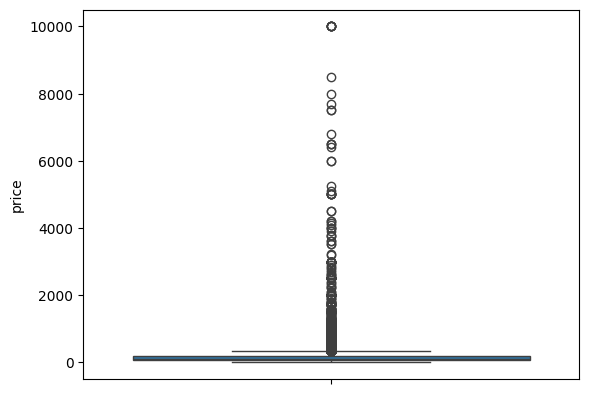

In [4]:
sns.boxplot(data=df, y='price')

**99.4 % of the listings are priced under $1000.**

In [5]:
total_count = df['price'].count()

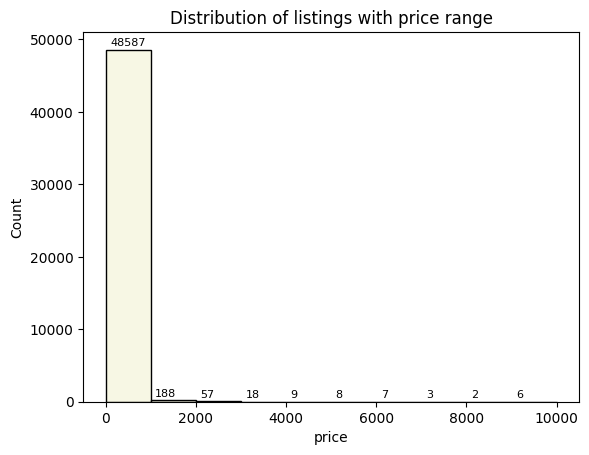

In [20]:
ax = sns.histplot(data=df, x='price', bins=10, color='beige')
for patch in ax.patches:
    plt.text(patch.xy[0]+100, patch.get_height()+500,patch.get_height(), fontsize=8)
plt.title("Distribution of listings with price range")
plt.show()

# Top 2 most expensive neighbours of each group

In [7]:
dfs = []
for i in df['neighbourhood_group'].unique():
    gr = df[df['neighbourhood_group'] ==i].groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().nlargest(2).reset_index()
    dfs.append(gr)

dfs
result_dfs = pd.concat(dfs, ignore_index=True)

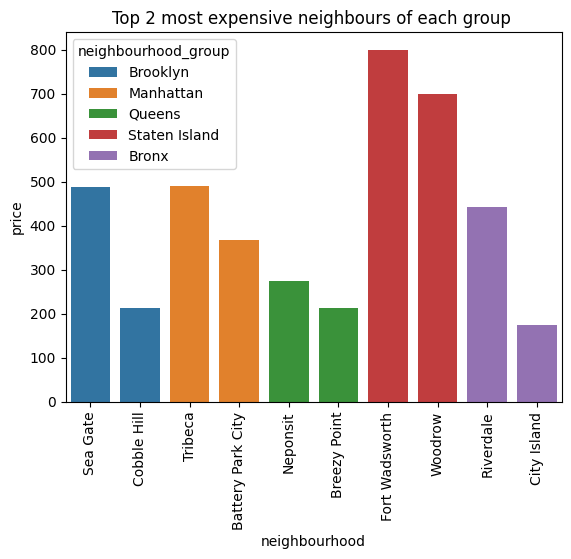

In [8]:
sns.barplot(data=result_dfs, x='neighbourhood',  y='price', hue='neighbourhood_group')
plt.xticks(rotation=90)
plt.title("Top 2 most expensive neighbours of each group ")
plt.show()
# result_dfs.sort_values(by='price').plot(kind='barh', x='neighbourhood')

# **Price Distribution in different neighbourhoods**

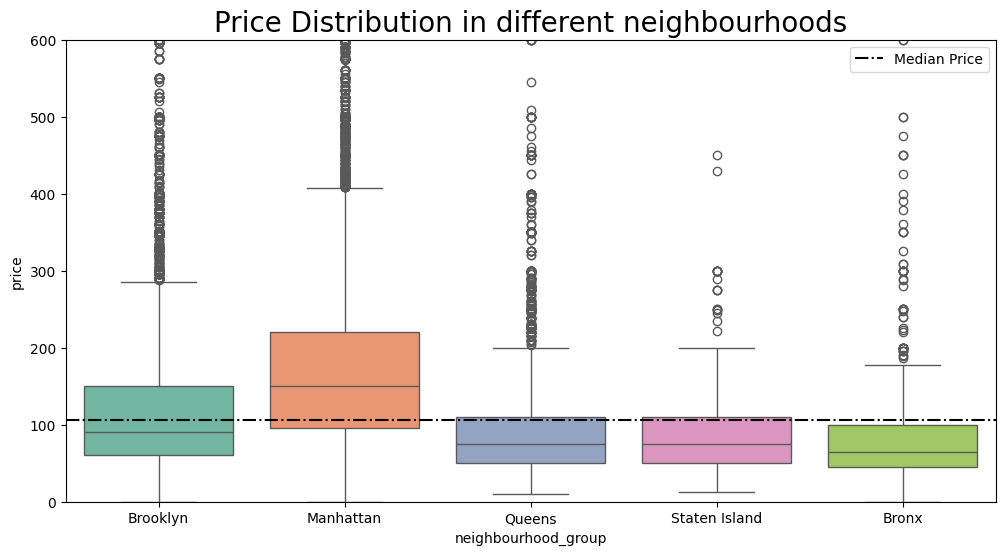

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='neighbourhood_group', palette="Set2")
plt.ylim(0,600)
plt.axhline(y=df['price'].median(), linestyle="-.", color='black', label="Median Price")
plt.legend()
plt.title("Price Distribution in different neighbourhoods", fontsize=20)
plt.show()

**pricing depends on where are you renting the property**

Manhattan is more expensive than other neighbourhoods

In [10]:
price_corr = df.drop(['host_id','id','has_reviews'], axis=1).corr(numeric_only=True)

# **Checking the correlation between different factors**

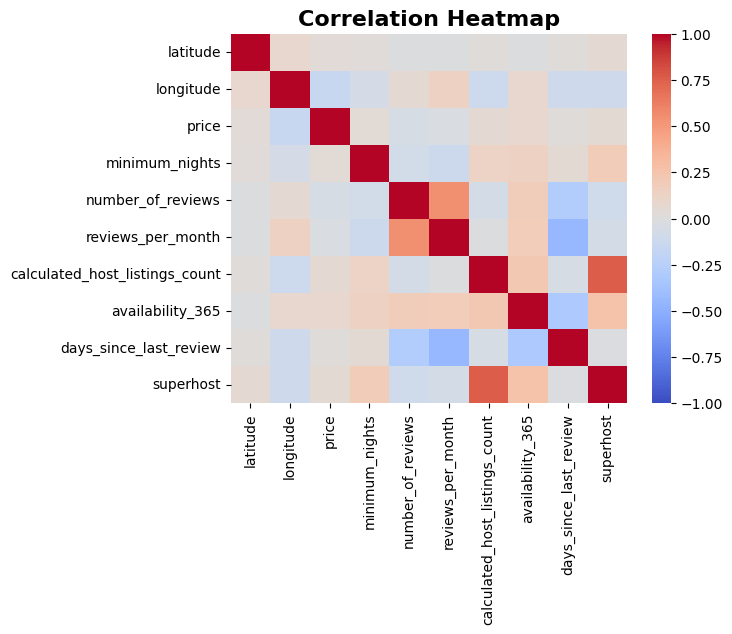

In [11]:
sns.heatmap(data=price_corr, cmap='coolwarm', vmin=-1)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

**there is no meaningful correlation between price and other factors**

Text(0.5, 1.0, 'Avg Price by room type')

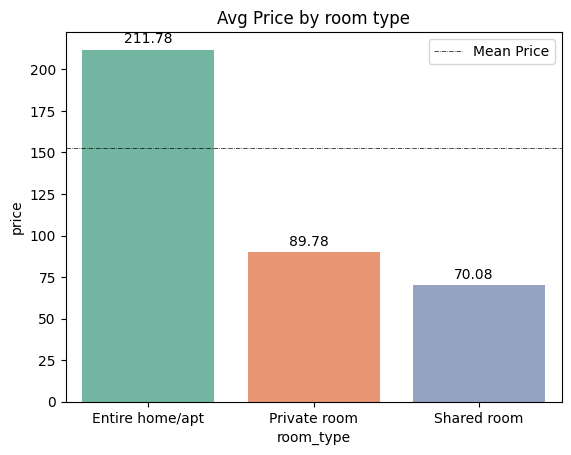

In [12]:
mean_by_room_type = df.groupby('room_type')['price'].mean().reset_index()
plot = sns.barplot(data=mean_by_room_type, x='room_type', y='price', hue='room_type', palette='Set2')
for patch in plot.patches:
    x = patch.xy[0]
    height = patch.get_height()
    color = patch.get_facecolor()
    plt.text(x+0.25, height+4, round(height,2))
plt.axhline(df['price'].mean(), linestyle="-.", label="Mean Price", color='black', linewidth=0.5)
plt.legend()
plt.title('Avg Price by room type')

**Renting Entire home pushes the prices of the listing higher, whereas sharing rooms are the cheapest way to rent a listing**

In [13]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.783367
Private room        89.784847
Shared room         70.075928
Name: price, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_18808\1014818942.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='room_type',y='availability_365', palette='Set2')


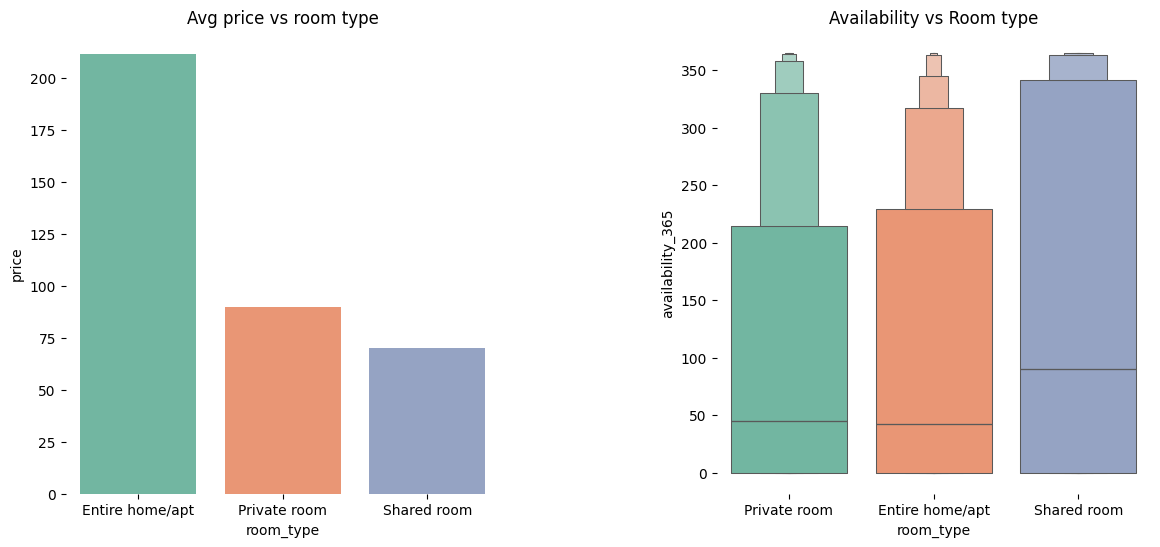

In [14]:
# sns.boxenplot(data=df[['room_type', 'availability_365']], x='room_type',y='availability_365', palette='Set2')
plt.figure(figsize=(14,6))
ax=plt.subplot(1,2,1)
sns.barplot(data=mean_by_room_type, x='room_type', y='price', hue='room_type', palette='Set2')
plt.title("Avg price vs room type")
for i in ['left','right', 'top','bottom']:
    ax.spines[i].set_visible(False)

ax1=plt.subplot(1,2,2)
sns.boxenplot(data=df, x='room_type',y='availability_365', palette='Set2')
plt.title("Availability vs Room type")
for i in ['left','right', 'top','bottom']:
    ax1.spines[i].set_visible(False)

plt.subplots_adjust(wspace=0.5)


Shared Rooms have lowest avg prices and highest availability

# a possible correlation between bookings and pricing

Text(0.5, 1.0, 'Number of reviews VS prices')

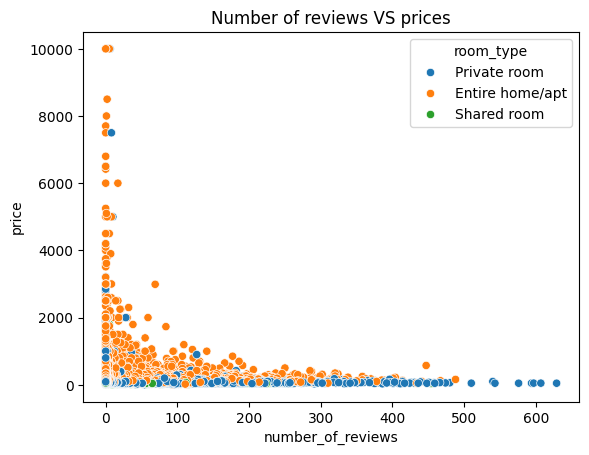

In [15]:
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type')      
plt.title("Number of reviews VS prices")

**Low prices led to more bookings which in turns result into more reviews**

In [16]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'days_since_last_review', 'has_reviews',
       'superhost'],
      dtype='object')

(0.0, 650.0)

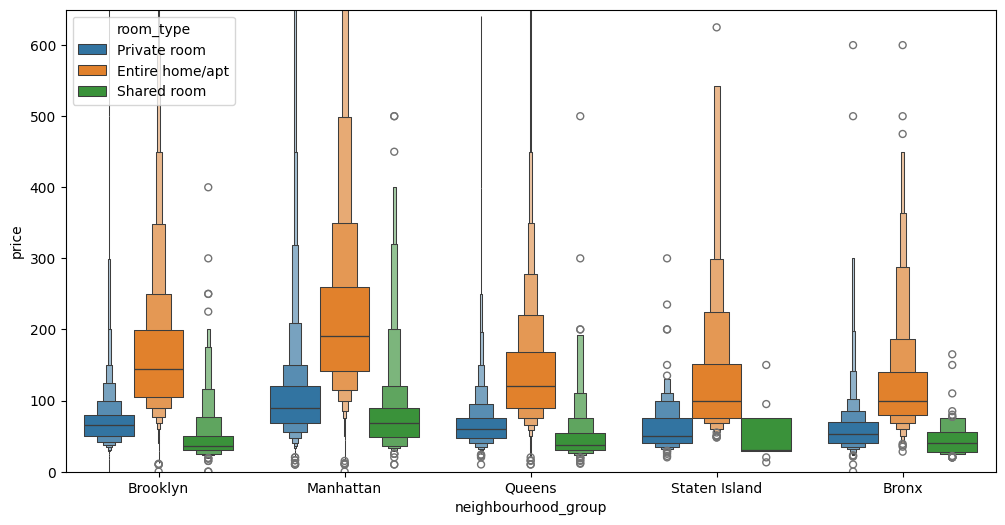

In [17]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.ylim(0,650)

Almost all the type of rooms are expensive in manhattan, private and shared rooms are cheapest in Staten Island, whereas Bronx has the lowest price for Entire home

In [18]:
df.groupby(['room_type','neighbourhood_group'])['price'].median().sort_values()

room_type        neighbourhood_group
Shared room      Staten Island           30.0
                 Brooklyn                36.0
                 Queens                  37.0
                 Bronx                   40.0
Private room     Staten Island           50.0
                 Bronx                   53.5
                 Queens                  60.0
                 Brooklyn                65.0
Shared room      Manhattan               69.0
Private room     Manhattan               90.0
Entire home/apt  Bronx                  100.0
                 Staten Island          100.0
                 Queens                 120.0
                 Brooklyn               145.0
                 Manhattan              191.0
Name: price, dtype: float64

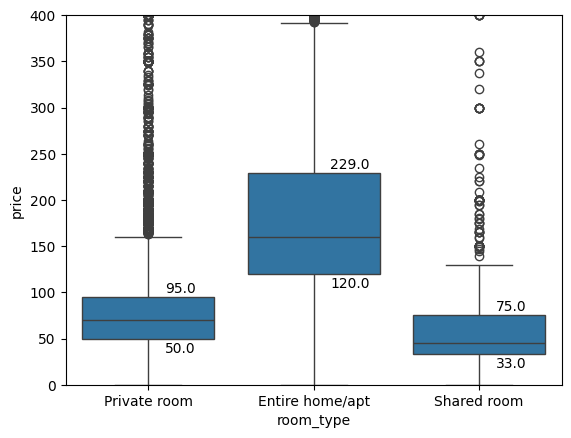

In [19]:
box = sns.boxplot(data=df, x='room_type', y='price')
plt.ylim(0,400)
for i in box.patches:
    vertices = i.get_path().vertices	# it returns the vertices of the boxes
    
    y_value = vertices[:,1]   #extracting only the y cordinates of the IQR boxes. 
    x_value = vertices[:,0].max()
    Q3 = y_value.max()      # maximum value of the IQR boxes will be Q3
    Q1 = y_value.min()     # minimum value of the IQR boxes will be Q1


    plt.text(x_value-0.3, Q3+5, Q3)
    plt.text(x_value-0.3, Q1-15, Q1)